In [99]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [100]:
df = pd.read_csv('Breast_Cancer.csv')

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


<Axes: >

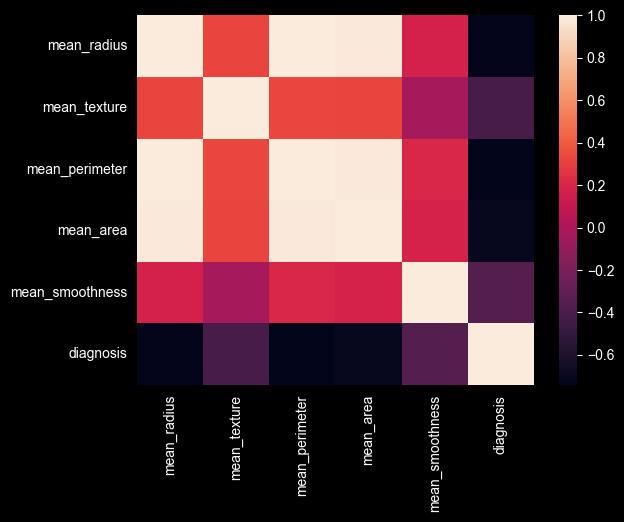

In [102]:
sns.heatmap(df.corr())

In [103]:
X=df.drop(['diagnosis'], axis=1)
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
df['diagnosis'].unique()
df['diagnosis'] = df['diagnosis'].map({'NoneCancerous': 0,'Cancerous': 1})

In [105]:
def min_max_train(data):
    df=data.select_dtypes('number').copy()
    dic={}
    for col in df.columns:
        min=df[col].min()
        max=df[col].max()
        if max == min:
            df[col]=0
        else:
            df[col]=(df[col]-min)/(max-min)
        dic.update({col:[max,min]})

    return df,dic

In [106]:
def min_max_test(data,dic):
    df=data.select_dtypes('number').copy()

    for col in dic:
        vals=dic.get(col)
        min=vals[1]
        max=vals[0]
        if max == min:
            df[col]=0
        else:
            df[col]=(df[col]-min)/(max-min)

    return df

In [107]:
X_train,dic=min_max_train(X_train)

In [108]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
149,0.296244,0.277308,0.283818,0.177894,0.167807
124,0.278123,0.225905,0.269406,0.164378,0.085638
421,0.342769,0.144403,0.355879,0.208401,0.402319
195,0.255595,0.223876,0.243936,0.148460,0.167509
545,0.290367,0.457220,0.277183,0.172831,0.296858
...,...,...,...,...,...
71,0.058622,0.166723,0.074558,0.031580,0.350084
106,0.193398,0.291512,0.191424,0.103879,0.512340
270,0.323179,0.240446,0.299372,0.198318,0.017643
435,0.307997,0.335137,0.305223,0.184116,0.431064


In [109]:
dic

{'mean_radius': [np.float64(28.11), np.float64(7.691)],
 'mean_texture': [np.float64(39.28), np.float64(9.71)],
 'mean_perimeter': [np.float64(188.5), np.float64(48.34)],
 'mean_area': [np.float64(2501.0), np.float64(170.4)],
 'mean_smoothness': [np.float64(0.1634), np.float64(0.06251)]}

In [110]:
X_test = min_max_test(X_test, dic)

In [111]:
def knn_model(row, k=15):
    row = np.asarray(row).ravel()
    X_np = np.asarray(X_train)
    distances = np.linalg.norm(X_np - row, axis=1)
    ind_k = np.argsort(distances)[:k]
    nearest_classes = y_train.iloc[ind_k]
    counts = nearest_classes.value_counts()
    max_count = counts.max()
    tied = counts[counts == max_count].index
    return sorted(tied)[0]

In [112]:
sample=X_test.sample().values
knn_model(sample,3)

1

In [113]:
y_pred = X_test.apply(lambda row: knn_model(row, k=15), axis=1)

In [114]:
def conf_matrix(y_true, y_pred):
    return pd.crosstab(y_true, y_pred).to_numpy()

In [115]:
print(classification_report(y_test, y_pred))
print(conf_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[ 59   4]
 [  2 106]]
